<a href="https://colab.research.google.com/github/hbr8218/machine-learning/blob/master/hbr8218/machine-learning/times_series/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
import gzip
for filename in ['sample_submission.csv.gz','sales_train.csv.gz','test.csv.gz']:
  with gzip.open(filename, 'rt') as f:
    data = f.read()
    with open(filename[:-3], 'wt') as f:
      f.write(data)
"""

"for filename in ['sample_submission.csv.gz','sales_train.csv.gz','test.csv.gz']:\n  with gzip.open(filename, 'rt') as f:\n    data = f.read()\n    with open(filename[:-3], 'wt') as f:\n      f.write(data)\n"

In [0]:
from google.colab import files

In [2]:
load = files.upload()

Saving sales_train.csv to sales_train.csv


In [0]:
import pandas as pd

In [0]:
df =  pd.read_csv('sales_train.csv')

In [17]:
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [18]:
df.shape

(2935849, 6)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              object
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [20]:
df.tail()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [0]:
record = df.groupby(["date_block_num"])["item_cnt_day"].sum()

In [0]:
record.index=pd.date_range(start = '2013-01-01',end='2015-10-01', freq = 'MS')

In [36]:
record.head(4)

2013-01-01    131479.0
2013-02-01    128090.0
2013-03-01    147142.0
2013-04-01    107190.0
Freq: MS, Name: item_cnt_day, dtype: float64

In [0]:
record = record.reset_index()

In [38]:
record.head()

,index,item_cnt_day
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


In [0]:
record = record.rename(columns={'item_cnt_day':'item_cnt_month'})

In [41]:
record.head()

,index,item_cnt_month
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


In [0]:
from fbprophet import Prophet

In [0]:
m = Prophet(yearly_seasonality=True)

In [0]:
record.columns=['ds','y']

In [47]:
record.head()

,ds,y
0,2013-01-01,131479.0
1,2013-02-01,128090.0
2,2013-03-01,147142.0
3,2013-04-01,107190.0
4,2013-05-01,106970.0


In [48]:
m.fit(ts)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods = 5,freq='MS')

In [0]:
forecast = m.predict(future)

In [55]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,141678.041599,129142.308629,134989.512220,141678.041599,141678.041599,-9566.680439,-9566.680439,-9566.680439,-9566.680439,-9566.680439,-9566.680439,0.0,0.0,0.0,132111.361160
1,2013-02-01,139958.210312,128164.678432,134327.257842,139958.210312,139958.210312,-8929.017339,-8929.017339,-8929.017339,-8929.017339,-8929.017339,-8929.017339,0.0,0.0,0.0,131029.192974
2,2013-03-01,138404.814316,145012.332490,151112.949311,138404.814316,138404.814316,9641.575105,9641.575105,9641.575105,9641.575105,9641.575105,9641.575105,0.0,0.0,0.0,148046.389421
3,2013-04-01,136684.983023,104518.838501,110587.701868,136684.983023,136684.983023,-29103.298617,-29103.298617,-29103.298617,-29103.298617,-29103.298617,-29103.298617,0.0,0.0,0.0,107581.684407
4,2013-05-01,135020.630152,104171.570657,110392.399580,135020.630152,135020.630152,-27684.049165,-27684.049165,-27684.049165,-27684.049165,-27684.049165,-27684.049165,0.0,0.0,0.0,107336.580987


In [56]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
34,2015-11-01,83193.957416,79970.254399,86539.031618
35,2015-12-01,125513.063181,122248.685267,128684.064827
36,2016-01-01,75625.688717,72334.189846,78815.903048
37,2016-02-01,40109.144632,36990.087029,43008.969697
38,2016-03-01,76664.084927,73354.672163,79756.130487


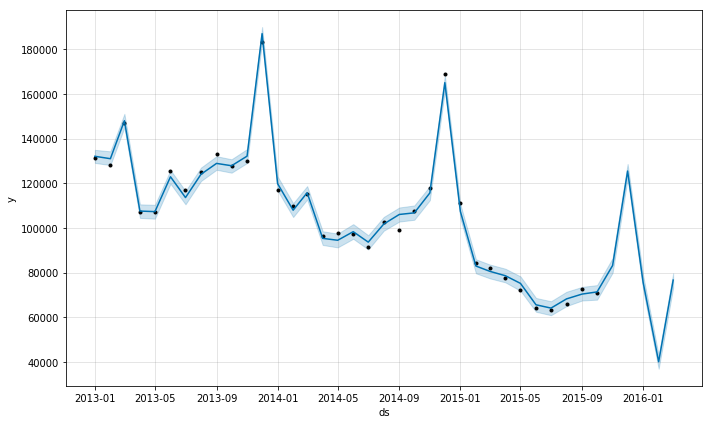

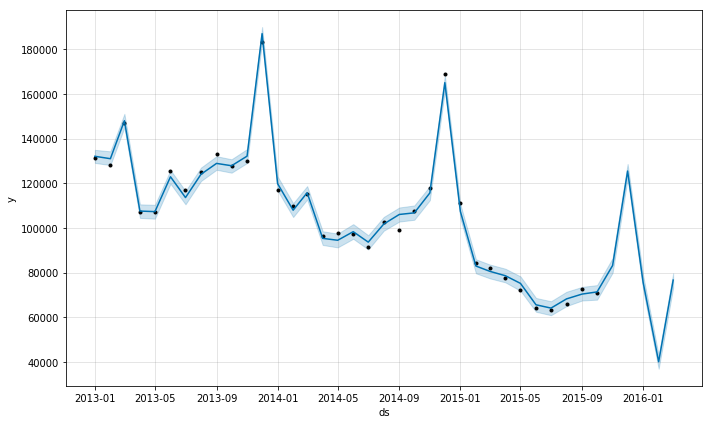

In [57]:
m.plot(forecast)

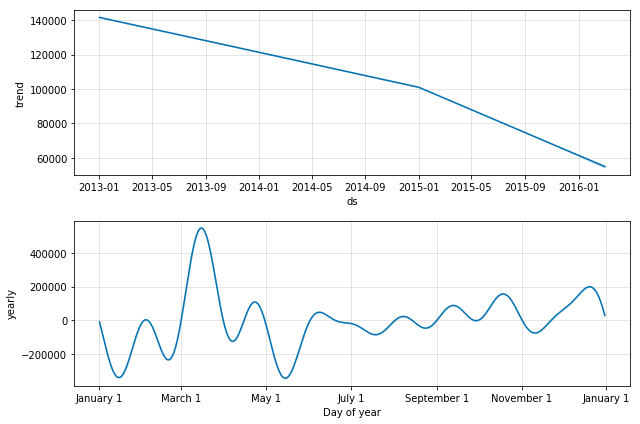

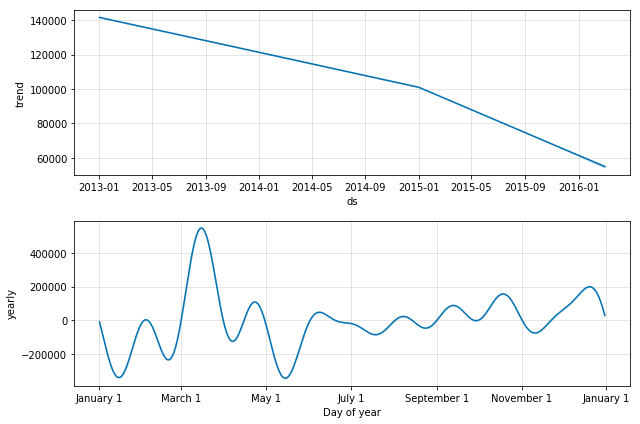

In [58]:
m.plot_components(forecast)